In [1]:
import pandas as pd
def NevilleInterpolation(x: list[float], y: list[float], x0: float) -> tuple[float, pd.DataFrame]:
    N = len(x)
    n = N - 1
    import numpy as np
    Q = np.empty(shape=(N, N))
    Q.fill(np.nan)
    Q[:,0] = y
    for i in range(1, N, 1):
        I = i + 1
        for j in range(1, I, 1):
            Q[i, j] = ((x0 - x[i-j]) * Q[i,j-1] - (x0-x[i]) * Q[i-1,j-1]) / (x[i]-x[i-j])
        p = Q[n,n]
        Q = pd.DataFrame(data=Q)
        Q.insert(loc=0, column="x", value=x)
        return(p,Q)

if __name__ == "__main__":
    x = [1,2,3]
    y = [2,5,10]
    x0 = 1.5
    p, Q = NevilleInterpolation(x=x, y=y, x0=x0)
    print(p)
    print(Q)

nan
   x     0    1   2
0  1   2.0  NaN NaN
1  2   5.0  3.5 NaN
2  3  10.0  NaN NaN


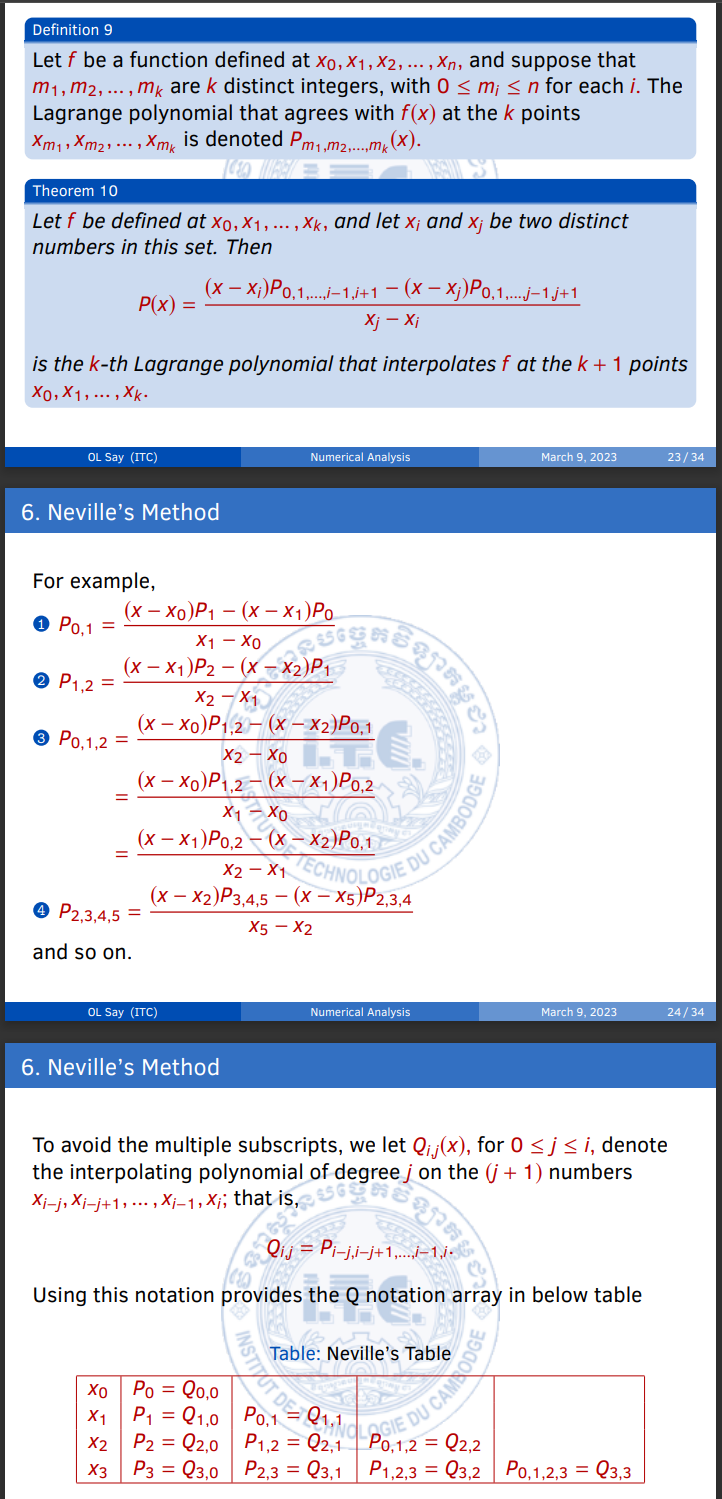

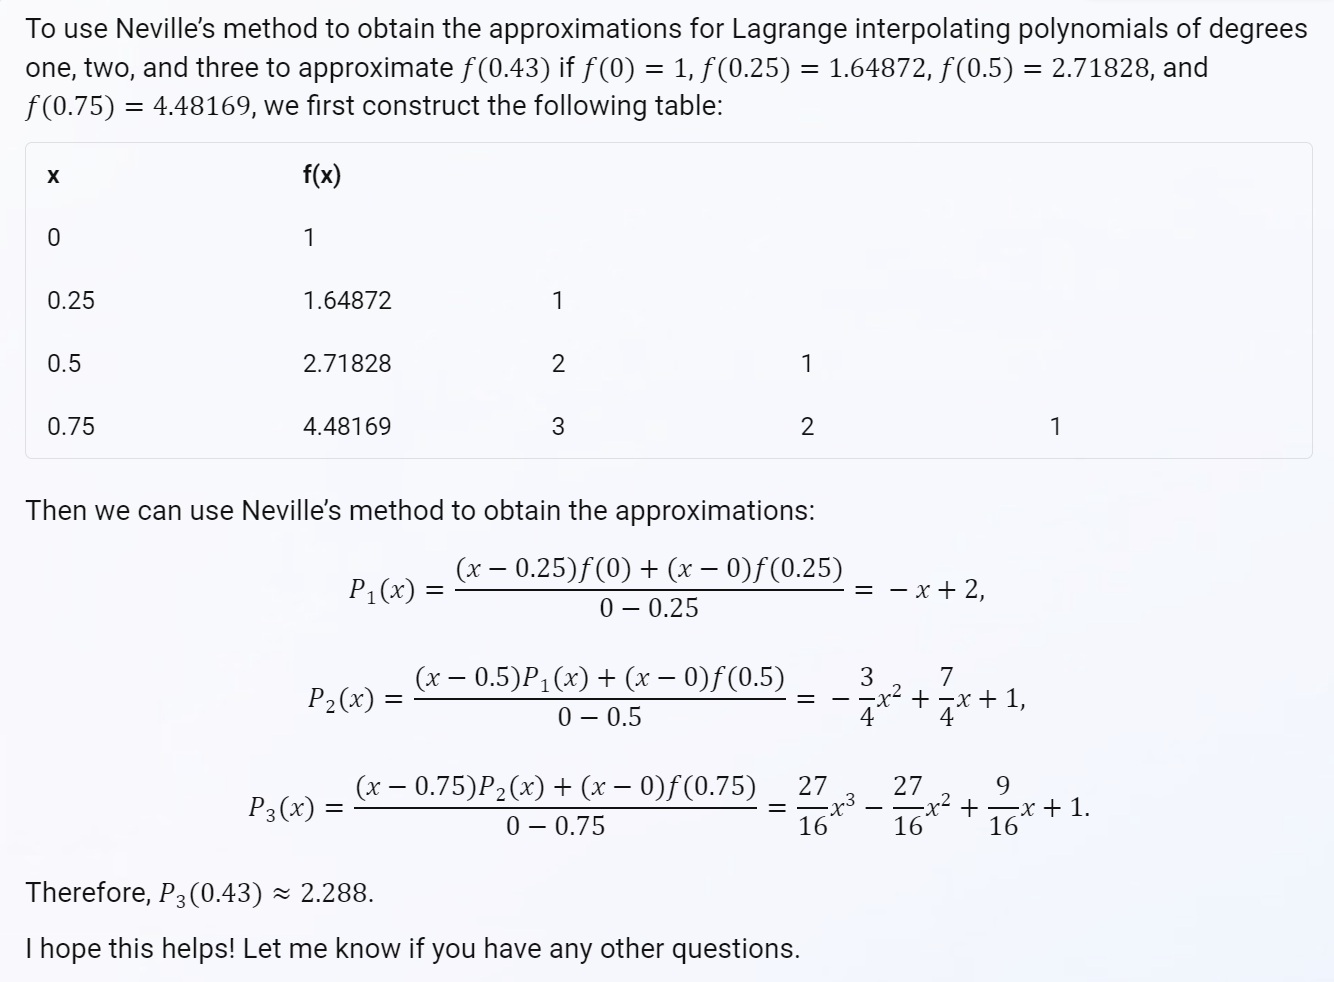

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline

x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

cs = CubicSpline(x, y, bc_type='natural')

print(cs(0.5))

0.5


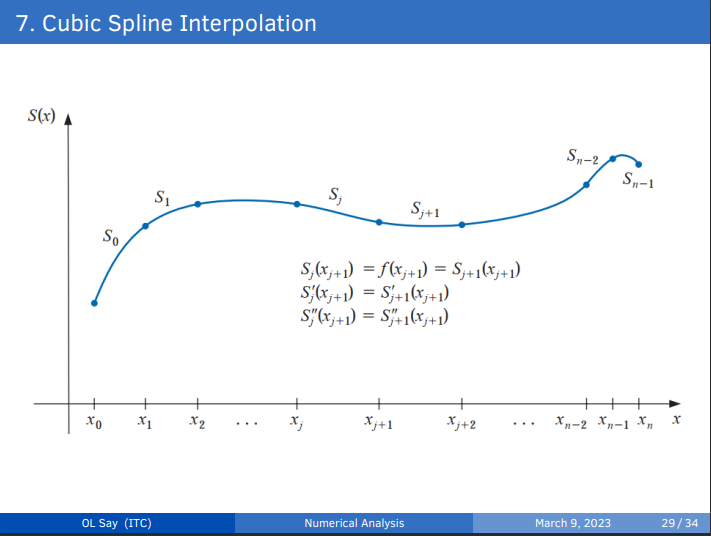

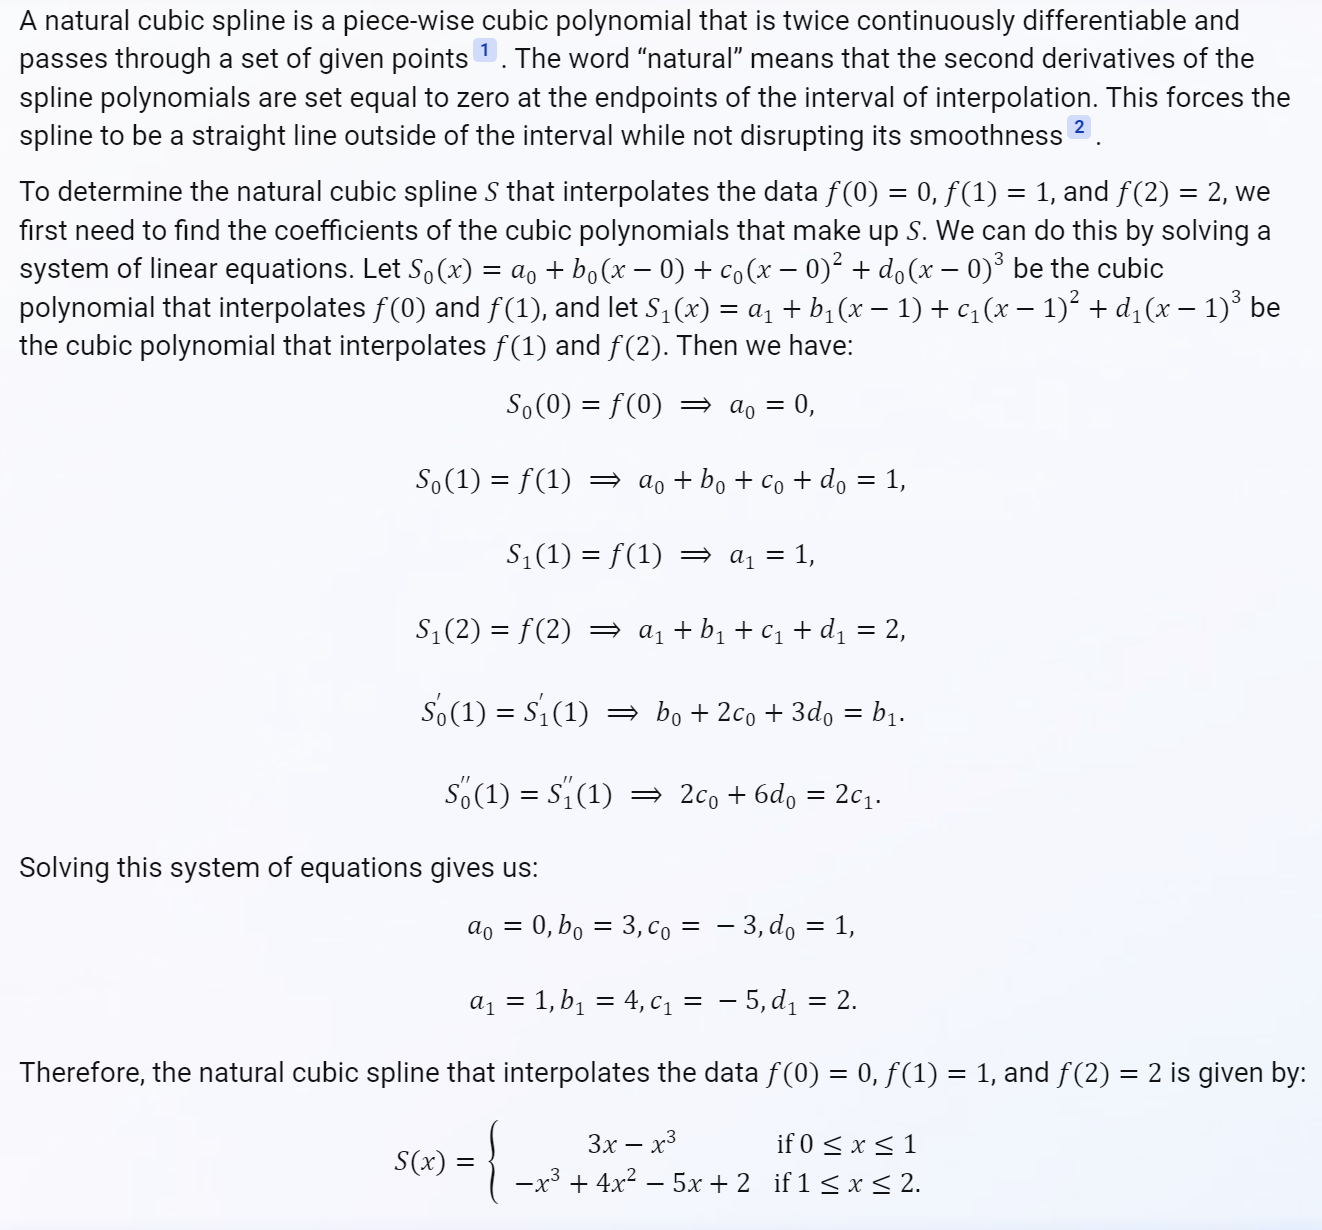

In [5]:
import numpy as np
from GaussianElimination import GaussianElimination

a = np.array([[2,-3,1],
              [3,2,-5],
              [2,4,-1]], dtype=np.float64)
b = np.array([3,-9,-5], dtype=np.float64)

u, c = GaussianElimination(a=a, b=b)
d = {'a': a, 'b': b, 'u': u, 'c': c}

for k in d.keys():
    print(k)
    print(d[k])

a
[[ 2. -3.  1.]
 [ 3.  2. -5.]
 [ 2.  4. -1.]]
b
[ 3. -9. -5.]
u
[[ 2.  -3.   1. ]
 [ 0.   6.5 -6.5]
 [ 0.   0.   5. ]]
c
[  3.         -13.5          6.53846154]


In [4]:
import numpy as np
from GaussianElimination import GaussianElimination

def DiagonalSolve(u: np.ndarray,
                  c: np.ndarray
                 ) -> np.ndarray:
    N = len(c)
    x = np.zeros_like(c)
    for i in range(0, N, 1):
        x[i] = c[i] / u[i, i]
    return x

if __name__ == '__main__':
    a = np.array([[2,-3,1],
                  [3,2,-5],
                  [2,4,-1]], dtype=np.float64)
    b = np.array([3,-9,-5], dtype=np.float64) 
    u, c = GaussianElimination(a=a, b=b)
    x = DiagonalSolve(u=u, c=c)
    print(x)


[ 1.5        -2.07692308  1.30769231]
